## Testing Fuzzy C Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import cv2 as cv

### MY PY

In [2]:
import numpy as np
from scipy.signal import convolve2d

from FuzzyCMeans import FuzzyCMeansSegmenter

### REST OF CODE

In [3]:
image = cv.imread('../../images/IMG_1802.jpeg')

In [4]:
if image.shape[-1] == 4:
    image = image[..., :3]

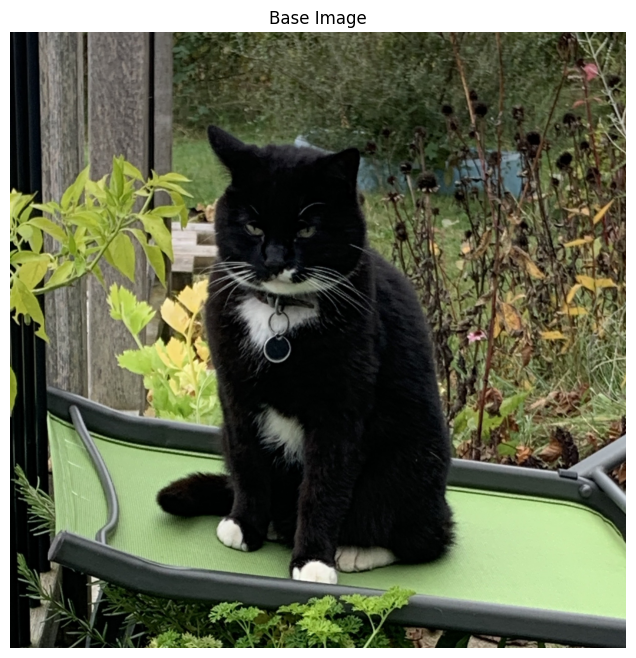

In [5]:
plt.figure(figsize=(8, 8))
plt.title('Base Image')
plt.imshow(image[:, :, ::-1], cmap='gray')
plt.axis("off")
plt.show()

In [6]:
segmenter = FuzzyCMeansSegmenter(5, 0, 5, 2, 2, 10)

In [7]:
res = segmenter.segment_image(image, None)

In [8]:
print(res.shape)

(1963, 1963)


In [9]:
colour_map = ["#440154FF", "#414487FF", "2A788EFF", "#22A884FF", "#7AD151FF", "#FDE725FF"]

def to_rgb(hex : str):
    substr = hex.replace("#", "")

    r = int(substr[0:2], 16)
    g = int(substr[2:4], 16)
    b = int(substr[4:6], 16)

    return [r, g, b]

In [10]:
colored_segmented_image = np.zeros_like(image)

for i in range(5):
        colored_segmented_image[res == i] = np.array(to_rgb(colour_map[i]))

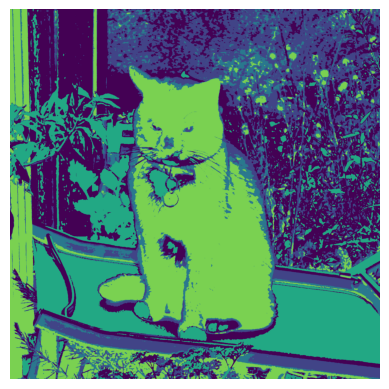

In [11]:
fig = plt.figure()
plt.axis("off")
plt.imshow(colored_segmented_image[:, :, ::])
plt.show()